In [1]:
import os, types
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten,BatchNormalization,LeakyReLU, Dropout
import tensorflow as tf
from keras.callbacks import ModelCheckpoint
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from keras.callbacks import ModelCheckpoint,EarlyStopping

In [5]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2)

In [6]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [7]:
x_train = train_datagen.flow_from_directory('C:/Users/USER/Desktop/Major/Data HW/MegaData/train', target_size = (64, 64), 
                                                 batch_size = 256, class_mode = 'categorical')
x_test = test_datagen.flow_from_directory('C:/Users/USER/Desktop/Major/Data HW/MegaData/test', target_size = (64, 64), 
                                                 batch_size = 256, class_mode = 'categorical')

Found 252850 images belonging to 459 classes.
Found 67447 images belonging to 459 classes.


In [8]:
index=list(x_train.class_indices.keys())
print(index)

['_', 'fullstop', 'ं', 'ः', 'अ', 'अं', 'अः', 'आ', 'इ', 'ई', 'उ', 'ऊ', 'ऋ', 'ए', 'ऐ', 'ओ', 'औ', 'क', 'कं', 'कः', 'का', 'कि', 'की', 'कु', 'कू', 'के', 'कै', 'को', 'कौ', 'क्ष', 'क्षं', 'क्षः', 'क्षा', 'क्षि', 'क्षी', 'क्षु', 'क्षू', 'क्षे', 'क्षै', 'क्षो', 'क्षौ', 'ख', 'खं', 'खः', 'खा', 'खि', 'खी', 'खु', 'खू', 'खे', 'खै', 'खो', 'खौ', 'ग', 'गं', 'गः', 'गा', 'गि', 'गी', 'गु', 'गू', 'गे', 'गै', 'गो', 'गौ', 'घ', 'घं', 'घः', 'घा', 'घि', 'घी', 'घु', 'घू', 'घे', 'घै', 'घो', 'घौ', 'ङ', 'च', 'चं', 'चः', 'चा', 'चि', 'ची', 'चु', 'चू', 'चे', 'चै', 'चो', 'चौ', 'छ', 'छं', 'छः', 'छा', 'छि', 'छी', 'छु', 'छू', 'छे', 'छै', 'छो', 'छौ', 'ज', 'जं', 'जः', 'जा', 'जि', 'जी', 'जु', 'जू', 'जे', 'जै', 'जो', 'जौ', 'ज्ञ', 'ज्ञं', 'ज्ञः', 'ज्ञा', 'ज्ञि', 'ज्ञी', 'ज्ञु', 'ज्ञू', 'ज्ञे', 'ज्ञै', 'ज्ञो', 'ज्ञौ', 'झ', 'झं', 'झः', 'झा', 'झि', 'झी', 'झु', 'झू', 'झे', 'झै', 'झो', 'झौ', 'ञ', 'ञं', 'ञः', 'ञा', 'ञि', 'ञी', 'ञु', 'ञू', 'ञे', 'ञै', 'ञो', 'ञौ', 'ट', 'टं', 'टः', 'टा', 'टि', 'टी', 'टु', 'टू', 'टे', 'टै', 'टो', 'टौ', 

In [6]:
model=Sequential()
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation=LeakyReLU(),padding='same'))
model.add(Convolution2D(32,(3,3),activation=LeakyReLU(),padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Convolution2D(64,(3,3),activation=LeakyReLU(),padding='same'))
model.add(Convolution2D(64,(3,3),activation=LeakyReLU(),padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Convolution2D(128,(3,3),activation='relu',padding='same'))
model.add(Convolution2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Convolution2D(256,(2,2),activation='relu',padding='same'))
model.add(Convolution2D(256,(2,2),activation='relu',padding='same'))
model.add(Convolution2D(256,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Dropout(0.25))
model.add(Dense(256))
model.add(Dropout(0.25))
model.add(Dense(459,activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        36928     
                                                        

In [8]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [10]:
filepath = 'new_data2_acc.hdf5'
filepath2 = 'new_data2_loss.hdf5'

checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_accuracy',verbose=1, save_best_only=True,mode='max')
checkpoint2 = ModelCheckpoint(filepath=filepath2, monitor='val_loss',verbose=1, save_best_only=True,mode='min')
stop=EarlyStopping(monitor="val_loss",patience=5,verbose=1,mode="min",restore_best_weights=True)
callbacks = [checkpoint,checkpoint2,stop]
output=model.fit_generator(x_train,steps_per_epoch=len(x_train),callbacks=callbacks,epochs=70,validation_data=x_test,validation_steps=len(x_test))


C:\Users\USER\AppData\Local\Temp\ipykernel_13836\3276262421.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  output=model.fit_generator(x_train,steps_per_epoch=len(x_train),callbacks=callbacks,epochs=70,validation_data=x_test,validation_steps=len(x_test))


Epoch 1/70
988/988 [==============================] - ETA: 0s - loss: 4.0666 - accuracy: 0.2377
Epoch 1: val_accuracy improved from -inf to 0.70258, saving model to new_data2_acc.hdf5

Epoch 1: val_loss improved from inf to 1.17545, saving model to new_data2_loss.hdf5
988/988 [==============================] - 4883s 5s/step - loss: 4.0666 - accuracy: 0.2377 - val_loss: 1.1754 - val_accuracy: 0.7026
Epoch 2/70
988/988 [==============================] - ETA: 0s - loss: 0.7273 - accuracy: 0.7991
Epoch 2: val_accuracy improved from 0.70258 to 0.87964, saving model to new_data2_acc.hdf5

Epoch 2: val_loss improved from 1.17545 to 0.50034, saving model to new_data2_loss.hdf5
988/988 [==============================] - 3158s 3s/step - loss: 0.7273 - accuracy: 0.7991 - val_loss: 0.5003 - val_accuracy: 0.8796
Epoch 3/70
988/988 [==============================] - ETA: 0s - loss: 0.3396 - accuracy: 0.9017
Epoch 3: val_accuracy improved from 0.87964 to 0.91034, saving model to new_data2_acc.hdf5

E

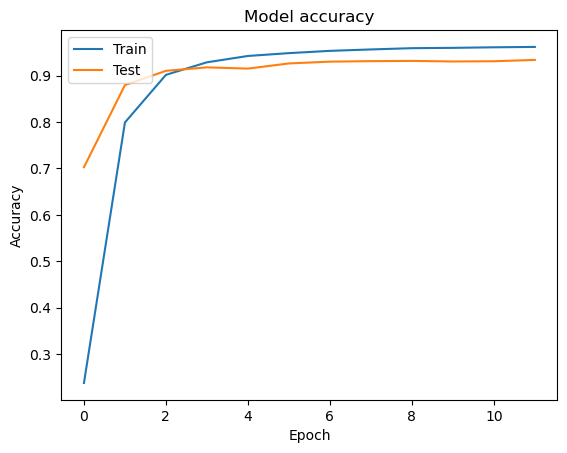

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(output.history['accuracy'])
plt.plot(output.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

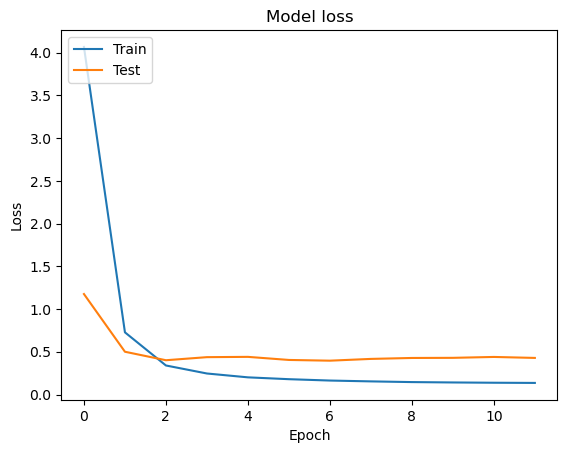

In [ ]:

plt.plot(output.history['loss'])
plt.plot(output.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [9]:
filepath = 'new_data2_acc.hdf5'
filepath2 = 'new_data2_loss.hdf5'
model1 = load_model(filepath)
model2 = load_model(filepath2)
x=image.img_to_array(image.load_img("C:/Users/USER/Desktop/Major/Data HW/MegaData/test/fullstop/fullstop_original_2023-03-11_111873-2--1--14_1.png_4368471c-58c4-4f01-8849-ee2ee487990e.png",color_mode="grayscale",target_size=(64,64)))
x = np.squeeze(x)
x = np.stack((x,) * 3, axis=-1)
print(x.shape)
x=np.expand_dims(x,axis=0)/255
print(index[np.argmax(model1.predict(x),axis=1)[0]])
print(index[np.argmax(model2.predict(x),axis=1)[0]])

(64, 64, 3)
1/1 [==============================] - 0s 421ms/step
fullstop
1/1 [==============================] - 0s 163ms/step
fullstop


In [14]:
x=image.img_to_array(image.load_img("C:/Users/USER/Desktop/Major/Data HW/MegaData/test/घे/36378_rlt.png",color_mode="grayscale",target_size=(64,64)))
x = np.squeeze(x)
x = np.stack((x,) * 3, axis=-1)
print(x.shape)
x=np.expand_dims(x,axis=0)/255
print(index[np.argmax(model1.predict(x),axis=1)[0]])
print(index[np.argmax(model2.predict(x),axis=1)[0]])

(64, 64, 3)
1/1 [==============================] - 0s 43ms/step
घे
1/1 [==============================] - 0s 33ms/step
घे


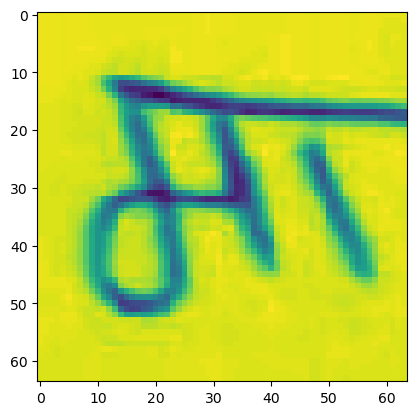

1/1 [==============================] - 0s 25ms/step
मा


In [30]:
x=image.img_to_array(image.load_img("C:/Users/USER/Desktop/Major/Data HW/MegaData/test2/ma.png",color_mode="grayscale",target_size=(64,64)))
from matplotlib import pyplot as plt
plt.imshow(x, interpolation='nearest')
plt.show()
x = np.squeeze(x)
x = np.stack((x,) * 3, axis=-1)
x=np.expand_dims(x,axis=0)/255
print(index[np.argmax(model1.predict(x),axis=1)[0]])

In [16]:
x=image.img_to_array(image.load_img("C:/Users/USER/Desktop/Major/Data HW/MegaData/test2/li.png",color_mode="grayscale",target_size=(64,64)))
x = np.squeeze(x)
x = np.stack((x,) * 3, axis=-1)
print(x.shape)
x=np.expand_dims(x,axis=0)/255
print(index[np.argmax(model1.predict(x),axis=1)[0]])
print(index[np.argmax(model2.predict(x),axis=1)[0]])

(64, 64, 3)
1/1 [==============================] - 0s 43ms/step
लि
1/1 [==============================] - 0s 34ms/step
लि


In [17]:
x=image.img_to_array(image.load_img("C:/Users/USER/Desktop/Major/Data HW/MegaData/test2/ma.png",color_mode="grayscale",target_size=(64,64)))
x = np.squeeze(x)
x = np.stack((x,) * 3, axis=-1)
print(x.shape)
x=np.expand_dims(x,axis=0)/255
print(index[np.argmax(model1.predict(x),axis=1)[0]])
print(index[np.argmax(model2.predict(x),axis=1)[0]])

(64, 64, 3)
1/1 [==============================] - 0s 42ms/step
मा
1/1 [==============================] - 0s 34ms/step
मा


In [18]:
x=image.img_to_array(image.load_img("C:/Users/USER/Desktop/Major/Data HW/MegaData/test2/h_A.png",color_mode="grayscale",target_size=(64,64)))
x = np.squeeze(x)
x = np.stack((x,) * 3, axis=-1)
print(x.shape)
x=np.expand_dims(x,axis=0)/255
print(index[np.argmax(model1.predict(x),axis=1)[0]])
print(index[np.argmax(model2.predict(x),axis=1)[0]])

(64, 64, 3)
1/1 [==============================] - 0s 42ms/step
हे
1/1 [==============================] - 0s 32ms/step
हे


In [19]:
x=image.img_to_array(image.load_img("C:/Users/USER/Desktop/Major/Data HW/MegaData/test2/ho.png",color_mode="grayscale",target_size=(64,64)))
x = np.squeeze(x)
x = np.stack((x,) * 3, axis=-1)
print(x.shape)
x=np.expand_dims(x,axis=0)/255
print(index[np.argmax(model1.predict(x),axis=1)[0]])
print(index[np.argmax(model2.predict(x),axis=1)[0]])

(64, 64, 3)
1/1 [==============================] - 0s 40ms/step
शि
1/1 [==============================] - 0s 38ms/step
झो


In [20]:
x=image.img_to_array(image.load_img("C:/Users/USER/Desktop/Major/Data HW/MegaData/test2/ru.png",color_mode="grayscale",target_size=(64,64)))
x = np.squeeze(x)
x = np.stack((x,) * 3, axis=-1)
print(x.shape)
x=np.expand_dims(x,axis=0)/255
print(index[np.argmax(model1.predict(x),axis=1)[0]])
print(index[np.argmax(model2.predict(x),axis=1)[0]])

(64, 64, 3)
1/1 [==============================] - 0s 40ms/step
सा
1/1 [==============================] - 0s 37ms/step
स


In [21]:
x=image.img_to_array(image.load_img("C:/Users/USER/Desktop/Major/Data HW/MegaData/test2/sha.png",color_mode="grayscale",target_size=(64,64)))
x = np.squeeze(x)
x = np.stack((x,) * 3, axis=-1)
print(x.shape)
x=np.expand_dims(x,axis=0)/255
print(index[np.argmax(model1.predict(x),axis=1)[0]])
print(index[np.argmax(model2.predict(x),axis=1)[0]])

(64, 64, 3)
1/1 [==============================] - 0s 44ms/step
क्षा
1/1 [==============================] - 0s 34ms/step
मा


In [69]:
x=image.img_to_array(image.load_img("C:/Users/USER/Desktop/Major/Data HW/MegaData/test2/ti.png",color_mode="grayscale",target_size=(64,64)))
x = np.squeeze(x)
x = np.stack((x,) * 3, axis=-1)
print(x.shape)
x=np.expand_dims(x,axis=0)/255
index[np.argmax(model.predict(x),axis=1)[0]]
print(index[np.argmax(model1.predict(x),axis=1)[0]])
print(index[np.argmax(model2.predict(x),axis=1)[0]])

(64, 64, 3)
1/1 [==============================] - 0s 28ms/step


'नि'

In [70]:
x=image.img_to_array(image.load_img("C:/Users/USER/Desktop/Major/Data HW/MegaData/test2/ti2.png",color_mode="grayscale",target_size=(64,64)))
x = np.squeeze(x)
x = np.stack((x,) * 3, axis=-1)
print(x.shape)
x=np.expand_dims(x,axis=0)/255
index[np.argmax(model.predict(x),axis=1)[0]]

(64, 64, 3)
1/1 [==============================] - 0s 33ms/step


'टी'

In [71]:
x=image.img_to_array(image.load_img("C:/Users/USER/Desktop/Major/Data HW/MegaData/test2/tre.png",color_mode="grayscale",target_size=(64,64)))
x = np.squeeze(x)
x = np.stack((x,) * 3, axis=-1)
print(x.shape)
x=np.expand_dims(x,axis=0)/255
index[np.argmax(model.predict(x),axis=1)[0]]

(64, 64, 3)
1/1 [==============================] - 0s 30ms/step


'ञे'

In [72]:
x=image.img_to_array(image.load_img("C:/Users/USER/Desktop/Major/Data HW/MegaData/test2/du.png",color_mode="grayscale",target_size=(64,64)))
x = np.squeeze(x)
x = np.stack((x,) * 3, axis=-1)
print(x.shape)
x=np.expand_dims(x,axis=0)/255
index[np.argmax(model.predict(x),axis=1)[0]]

(64, 64, 3)
1/1 [==============================] - 0s 30ms/step


'डू'

In [73]:
x=image.img_to_array(image.load_img("C:/Users/USER/Desktop/Major/Data HW/MegaData/test2/_.png",color_mode="grayscale",target_size=(64,64)))
x = np.squeeze(x)
x = np.stack((x,) * 3, axis=-1)
print(x.shape)
x=np.expand_dims(x,axis=0)/255
index[np.argmax(model.predict(x),axis=1)[0]]

(64, 64, 3)
1/1 [==============================] - 0s 28ms/step


'बु'

In [74]:
x=image.img_to_array(image.load_img("C:/Users/USER/Desktop/Major/Data HW/MegaData/test2/dd.png",color_mode="grayscale",target_size=(64,64)))
x = np.squeeze(x)
x = np.stack((x,) * 3, axis=-1)
print(x.shape)
x=np.expand_dims(x,axis=0)/255
index[np.argmax(model.predict(x),axis=1)[0]]

(64, 64, 3)
1/1 [==============================] - 0s 31ms/step


'९'

In [75]:
x=image.img_to_array(image.load_img("C:/Users/USER/Desktop/Major/Data HW/MegaData/test2/!.png",color_mode="grayscale",target_size=(64,64)))
x = np.squeeze(x)
x = np.stack((x,) * 3, axis=-1)
print(x.shape)
x=np.expand_dims(x,axis=0)/255
index[np.argmax(model.predict(x),axis=1)[0]]

(64, 64, 3)
1/1 [==============================] - 0s 48ms/step


'ा'

In [76]:
x=image.img_to_array(image.load_img("C:/Users/USER/Desktop/Major/Data HW/MegaData/test2/6.png",color_mode="grayscale",target_size=(64,64)))
x = np.squeeze(x)
x = np.stack((x,) * 3, axis=-1)
print(x.shape)
x=np.expand_dims(x,axis=0)/255
index[np.argmax(model.predict(x),axis=1)[0]]

(64, 64, 3)
1/1 [==============================] - 0s 29ms/step


'६'

In [77]:
x=image.img_to_array(image.load_img("C:/Users/USER/Desktop/Major/Data HW/MegaData/test2/4.png",color_mode="grayscale",target_size=(64,64)))
x = np.squeeze(x)
x = np.stack((x,) * 3, axis=-1)
print(x.shape)
x=np.expand_dims(x,axis=0)/255
index[np.argmax(model.predict(x),axis=1)[0]]

(64, 64, 3)
1/1 [==============================] - 0s 33ms/step


'६'

In [78]:
x=image.img_to_array(image.load_img("C:/Users/USER/Desktop/Major/Data HW/MegaData/test2/2.png",color_mode="grayscale",target_size=(64,64)))
x = np.squeeze(x)
x = np.stack((x,) * 3, axis=-1)
print(x.shape)
x=np.expand_dims(x,axis=0)/255
index[np.argmax(model.predict(x),axis=1)[0]]

(64, 64, 3)
1/1 [==============================] - 0s 32ms/step


'व'

In [83]:
from tensorflow.keras.preprocessing import image
import os
import numpy as np
from sklearn.metrics import classification_report

# Set test data directory and target size
test_data_dir = 'C:/Users/USER/Desktop/Major/Data HW/MegaData/test'
target_size = (64, 64)

# Initialize lists to store test data and labels
x_test = []
y_test = []

# Loop over subdirectories in test data directory
for subdir in os.listdir(test_data_dir):
    # Get class label from subdirectory name
    class_label = subdir
    
    # Loop over images in subdirectory
    for filename in os.listdir(os.path.join(test_data_dir, subdir)):
        # Load image and resize it to target size
        img = image.load_img(os.path.join(test_data_dir, subdir, filename), target_size=target_size)
        
        # Convert image to numpy array and rescale pixel values
        img_array = image.img_to_array(img) / 255.0
        
        # Append image array and class label to test data and labels lists
        x_test.append(img_array)
        y_test.append(class_label)

# Convert test data and labels lists to numpy arrays
x_test = np.array(x_test)
y_test = np.array(y_test)

# Get predicted class probabilities
y_pred = model.predict(x_test)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)



2108/2108 [==============================] - 155s 73ms/step


ValueError: Mix of label input types (string and number)

In [85]:
from keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Create DirectoryIterator for test data
test_iterator = test_datagen.flow_from_directory(
    'C:/Users/USER/Desktop/Major/Data HW/MegaData/test',
    target_size=(64, 64),
    batch_size=256,
    class_mode='categorical'
)

# Get class label to index mapping
class_indices = test_iterator.class_indices

# Convert true class labels to integer labels
y_test = np.array([class_indices[label] for label in y_test])
# Get classification report
report = classification_report(y_test, y_pred_classes, output_dict=True)

# Get class labels
class_labels = report.keys()

# Sort classes based on f1-score
sorted_classes = sorted(class_labels, key=lambda x: report[x]['f1-score'])

# Print sorted classes with their f1-score
for class_name in sorted_classes:
    print(f"{class_name}: {report[class_name]['f1-score']}")

Found 67447 images belonging to 459 classes.


TypeError: 'float' object is not subscriptable

In [81]:
type(x_test)

keras.preprocessing.image.DirectoryIterator